In [1]:
from __future__ import print_function
import numpy as np 

def acc(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return float(correct)/y_true.shape[0]

y_true = np.array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])
y_pred = np.array([0, 1, 0, 2, 1, 1, 0, 2, 1, 2])
print('accuracy = ', acc(y_true, y_pred))

accuracy =  0.6


In [2]:
def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes 
    cm = np.zeros((N, N))
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
    return cm 

cnf_matrix = my_confusion_matrix(y_true, y_pred)
print('Confusion matrix:')
print(cnf_matrix)
print('\nAccuracy:', np.diagonal(cnf_matrix).sum()/cnf_matrix.sum())

Confusion matrix:
[[2. 1. 1.]
 [1. 2. 0.]
 [0. 1. 2.]]

Accuracy: 0.6


In [3]:
normalized_confusion_matrix = cnf_matrix/cnf_matrix.sum(axis = 1, keepdims = True)
print('\nConfusion matrix (with normalizatrion:)')
print(normalized_confusion_matrix)


Confusion matrix (with normalizatrion:)
[[0.5        0.25       0.25      ]
 [0.33333333 0.66666667 0.        ]
 [0.         0.33333333 0.66666667]]


In [4]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[2 1 1]
 [1 2 0]
 [0 1 2]]


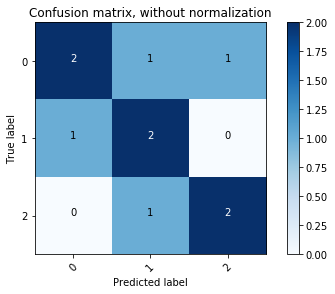

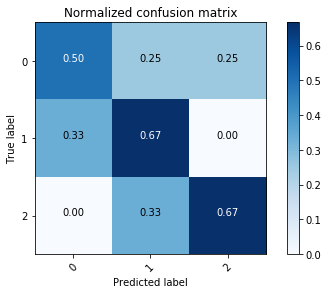

In [6]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()